In [1]:
pip install BeautifulSoup4


In [2]:
pip install lxml

In [3]:
pip install --upgrade gensim 

     |████████████████████████████████| 23.9MB 125kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [4]:
import bs4 as bs
import urllib.request
import re
import nltk
import gensim 
nltk.download('punkt')
nltk.download('stopwords')

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
datos=urllib.request.urlopen('Your_Corpus_Text.txt')
nandaBase=datos.read()

In [7]:
parsedNanda=bs.BeautifulSoup(nandaBase,'lxml')
parrafos=parsedNanda.find_all('p')
texto = ""
for p in parrafos:
 texto +=p.text

# **Preprocessing:** In this stage of processing, we perform dataset cleaning to make our corpus provide better results.

At last, to obtain our corpus by adding only those words from the dataset that are not stopwords in the English language. These stopwords are the most common words in a language, such as ‘the’, ‘an’, ‘in’, etc.

The result of this step is a clean and ready to use data corpus which will be used to create and train the model.

In [8]:
# 1. lower case
texto=texto.lower()
# 2. Remove non-letters   
texto = re.sub("[^a-zA-Z]", " ", texto)   
# 3. Remove spaces   
texto = re.sub(r"\s+", " ", texto)   
#4. preparando el dataset
allSentences=nltk.sent_tokenize(texto)
allWords=[nltk.word_tokenize(sent) for sent in allSentences]

#5. Removing StopWords
from nltk.corpus import stopwords
for i in range(len(allWords)):
  allWords[i]= [ w for w in allWords[i] if w not in stopwords.words('english')]

In [9]:
print(texto)

 nursing diagnosis an international terminology nursing commonalities around the globe nursing education and practice professional associations and nursing classifications international implementation summary acknowledgment of contributors to this chapter references clinical reasoning from assessment to diagnosis clinical reasoning introduction clinical reasoning within the nursing process the nursing process references clinical application data analysis to determine appropriate nursing diagnosis clustering of information seeing a pattern identifying potential nursing diagnoses diagnostic hypotheses refining the diagnosis confirming refuting potential nursing diagnoses eliminating possible diagnoses potential new diagnoses di erentiating similar diagnoses diagnosing prioritizing summary references introduction to the nanda international taxonomy of nursing diagnoses introduction to taxonomy organizing nursing knowledge using nanda i taxonomy the nanda i nursing diagnosis taxonomy ii a 

In [10]:
#Creating the Word2Vec model
import gensim.downloader as gensim_api 
import gensim 
vector=gensim.models.Word2Vec(allWords,min_count=2)

In [11]:
vocabulario=list(vector.wv.index_to_key)
print(vocabulario)

['risk', 'diagnosis', 'individuals', 'nursing', 'inadequate', 'health', 'nanda', 'level', 'factors', 'expresses', 'self', 'diagnoses', 'evidence', 'impaired', 'focus', 'support', 'care', 'inefective', 'definition', 'difficulty', 'related', 'family', 'approved', 'knowledge', 'desire', 'characteristics', 'defining', 'associated', 'enhance', 'conditions', 'decreased', 'revised', 'physical', 'com', 'available', 'www', 'use', 'thieme', 'population', 'literature', 'original', 'activity', 'clinical', 'altered', 'social', 'injury', 'history', 'may', 'pattern', 'readiness', 'class', 'enhanced', 'pressure', 'process', 'body', 'coping', 'pain', 'infant', 'experiencing', 'syndrome', 'domain', 'validity', 'child', 'diagnostic', 'disorders', 'patient', 'behavior', 'role', 'assessment', 'management', 'development', 'stress', 'e', 'low', 'international', 'tissue', 'response', 'data', 'nurse', 'loss', 'one', 'insuficient', 'nurses', 'caregiver', 'urinary', 'age', 'practice', 'safety', 'di', 'protection

In [12]:
v1=vector.wv['risk']
print(v1)

[-0.05077718  0.06844804  0.03100569  0.00232655 -0.01733947 -0.13150586
 -0.05702614  0.18891191 -0.06436876  0.04228729 -0.02327897  0.01167688
 -0.21164867  0.03044396  0.13660668 -0.07681344 -0.04006444 -0.14792411
 -0.09815092 -0.2994545   0.03552859 -0.00202856  0.23111294  0.00715531
 -0.00828379 -0.02909985  0.00348605 -0.08866396 -0.04651834  0.08779158
 -0.00681755  0.0931483   0.14559157 -0.02543141 -0.01778586  0.00485191
 -0.08321118 -0.06237949 -0.14145122 -0.12676202  0.02998226 -0.07491677
 -0.07228898  0.09107304  0.06988392 -0.07752705 -0.06897857  0.02102564
  0.0850159   0.03410597  0.04568614 -0.02654134  0.02268524 -0.02467287
  0.00358865  0.01429816 -0.005523   -0.03617675  0.01230884  0.15197618
  0.08249496 -0.01109128 -0.15418914 -0.15905388 -0.09282432  0.09354375
  0.09335634  0.16122805 -0.20473453  0.17030826 -0.1674014  -0.01902565
  0.0220355   0.05855541  0.10796937  0.00485749 -0.00186969 -0.04592035
  0.01324786 -0.0153587  -0.02690443  0.2357627  -0

In [13]:
sim_words=vector.wv.most_similar('parenting')
for x in sim_words:
  print(x)

('ineffective', 0.6932055950164795)
('also', 0.6878591179847717)
('response', 0.6797257661819458)
('chronic', 0.6763806343078613)
('enhanced', 0.6742854118347168)
('impaired', 0.6736438274383545)
('establish', 0.6736261248588562)
('risk', 0.6733039617538452)
('spiritual', 0.6731975674629211)
('related', 0.6729505062103271)


In [14]:
#exporto el modelo
from gensim.models import Word2Vec, KeyedVectors   
vector.wv.save_word2vec_format('model.bin', binary=True)

In [15]:
from gensim. models import KeyedVectors
# Load gensim word2vec
w2v = vector.wv
import io
nombreVector='nanda_vector.tsv'
nombreModelo='nanda_model.tsv'

In [16]:


# Vector file, `\t` seperated the vectors and `\n` seperate the words
"""
0.1\t0.2\t0.5\t0.9
0.2\t0.1\t5.0\t0.2
0.4\t0.1\t7.0\t0.8
"""
out_v = io.open(nombreVector, 'w', encoding='utf-8')

# Meta data file, `\n` seperated word
"""
token1
token2
token3
"""
out_m = io. open(nombreModelo, 'w', encoding='utf-8')

# Write meta file and vector file
for index in range(len(w2v.index_to_key)):
    word = w2v.index_to_key[index]
    vec = w2v. vectors[index]
    out_m. write(word + "\n")
    out_v. write('\t'.  join([str(x) for x in vec]) + "\n")
out_v. close()
out_m. close()


Copy the model and vectors in  https://projector.tensorflow.org/
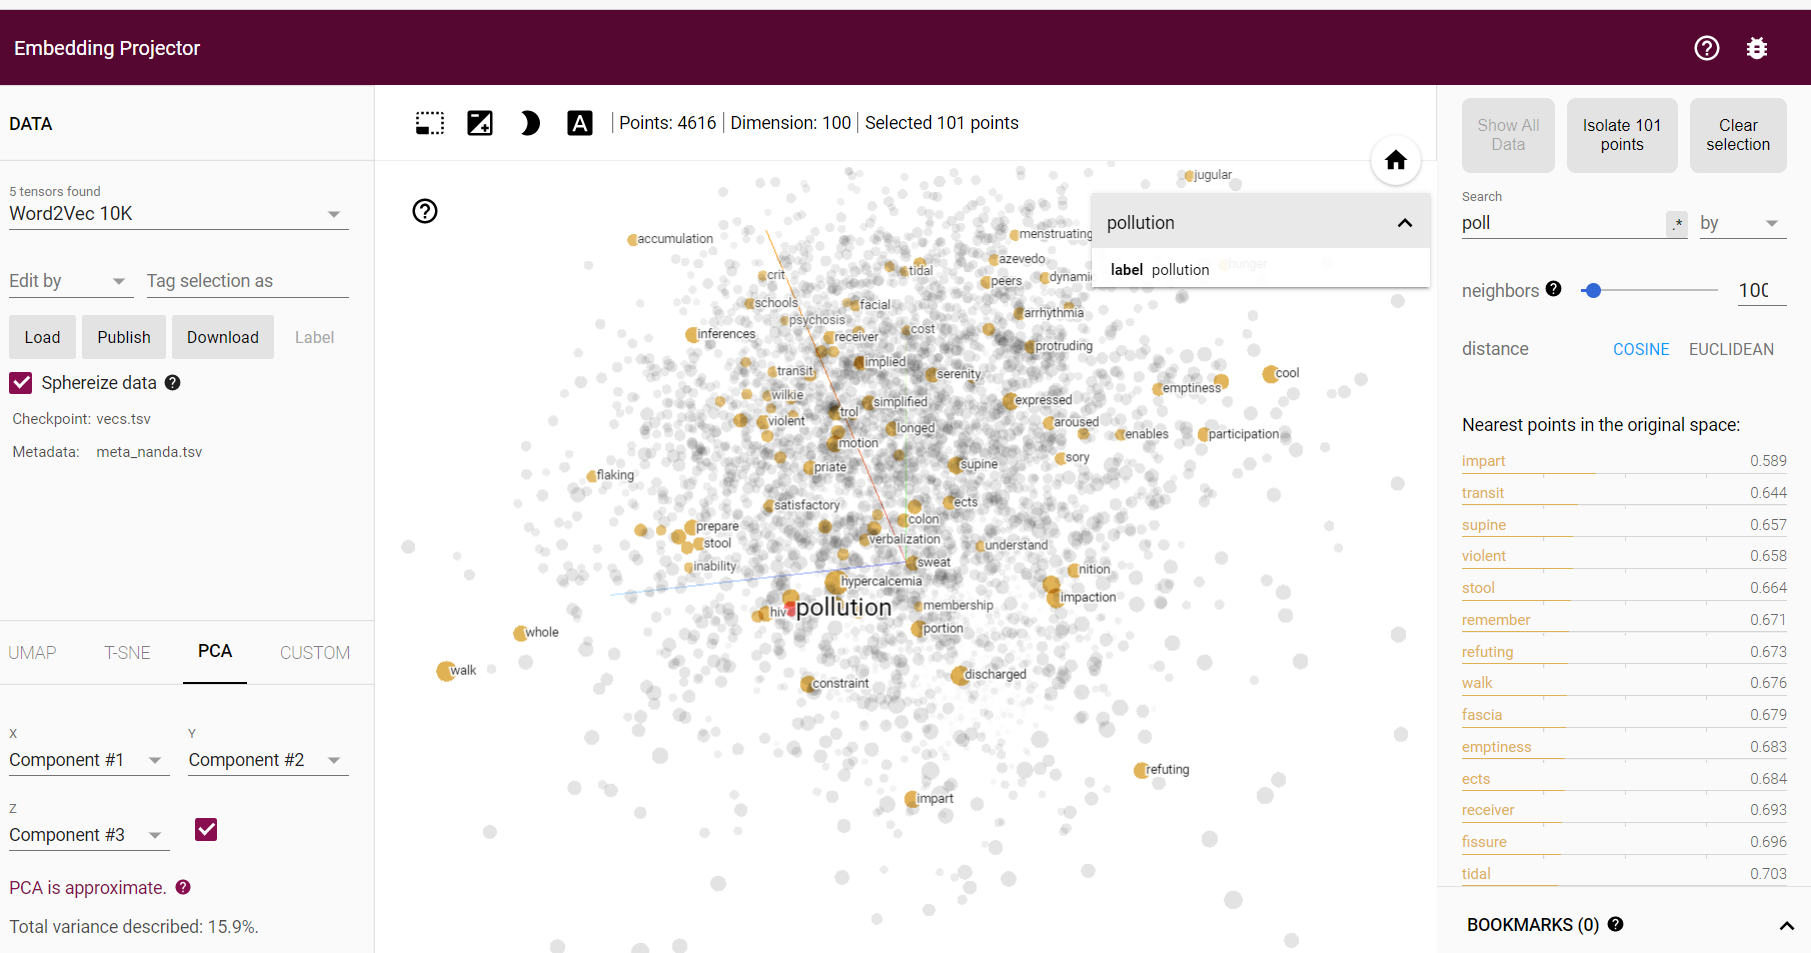